In [20]:
import pandas as pd
import numpy as np

In [2]:
df =pd.read_csv('../dataset/hotel_bookings.csv')

In [3]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values>0]
print(missing_values)

children         4
country        488
agent        16340
company     112593
dtype: int64


In [4]:
df['children'] = df['children'].fillna(0)

In [5]:
df['country'] =df['country'].fillna('unknown')

In [6]:
df['agent'] =df['agent'].fillna(0)

In [7]:
df['company'] =df['company'].fillna(0)

In [8]:
missing_values_after = df.isnull().sum().sum()
missing_values_after = missing_values_after[missing_values_after>0]
print(missing_values_after)

[]


In [9]:
data_types = df.dtypes
print(data_types)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [11]:
print(data_types)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [12]:
no_guests = df[(df['adults'] == 0) &( df['children'] == 0) &(df['babies']==0)]
len(no_guests)

180

In [41]:
zero_stays = df[(df['stays_in_week_nights']==0) & (df['stays_in_weekend_nights']==0) & (df['is_canceled']==0)]
len(zero_stays)

680

In [42]:
df.loc[((df['stays_in_week_nights']==0) & (df['stays_in_weekend_nights']==0) & (df['is_canceled']==0)),'day_use'] =1 
df['day_use']=df['day_use'].fillna(0)
len(df[df['day_use'] == 1])

680

In [47]:
cat_cols = ['hotel','is_canceled','meal','country','market_segment','distribution_channel','is_repeated_guest','distribution_channel','reserved_room_type','customer_type','reservation_status','deposit_type']

In [50]:
for cat_col in cat_cols:
    unique_values =df[cat_col].unique()
    print(f"\n{cat_col} : \n{unique_values}\n")


hotel : 
['Resort Hotel' 'City Hotel']


is_canceled : 
[0 1]


meal : 
['BB' 'FB' 'HB' 'SC']


country : 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND'
 'RWA' 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA'
 'TMP' 'GLP' 'KEN' 

In [51]:
df['meal']= df['meal'].replace(to_replace='Undefined',value='SC')

In [55]:
duplicates = df[df.duplicated()]
len(duplicates)

0

In [54]:
df = df.drop_duplicates()

In [56]:
stats = df.describe()
print(stats)

        is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     79.891368        2016.210296   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   
std        0.446466     86.052325           0.686102   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000                  31.000000   

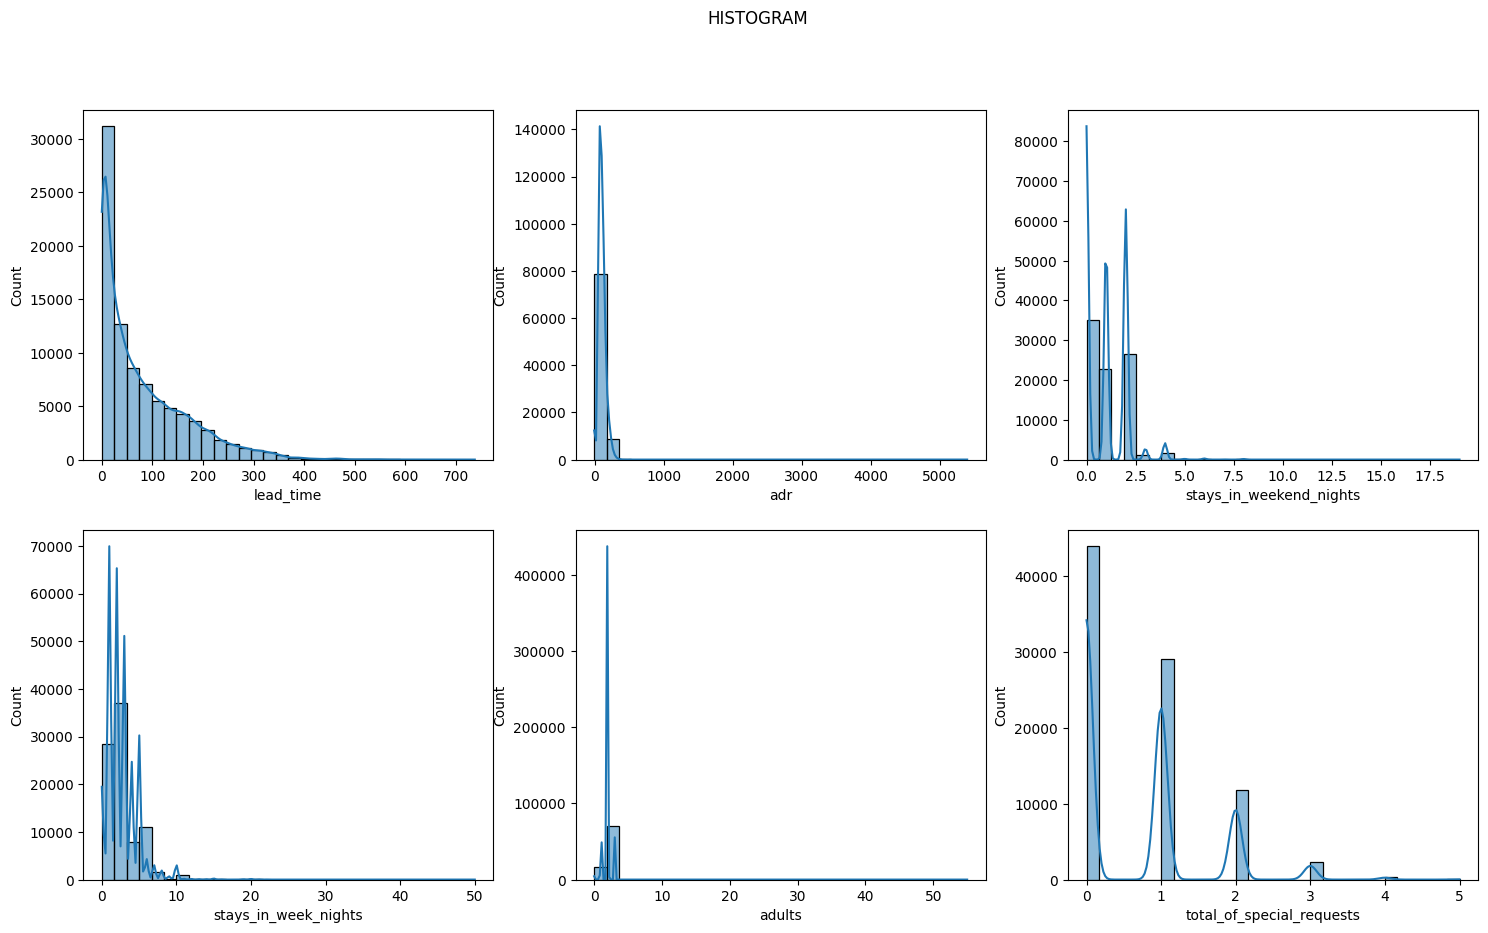

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(18,10))
fig.suptitle("HISTOGRAM")
variables =['lead_time','adr','stays_in_weekend_nights','stays_in_week_nights','adults','total_of_special_requests']


for ax,variable in zip(axes.ravel(),variables):
    sns.histplot(df[variable],bins=30,ax=ax,kde=True)

plt.show()

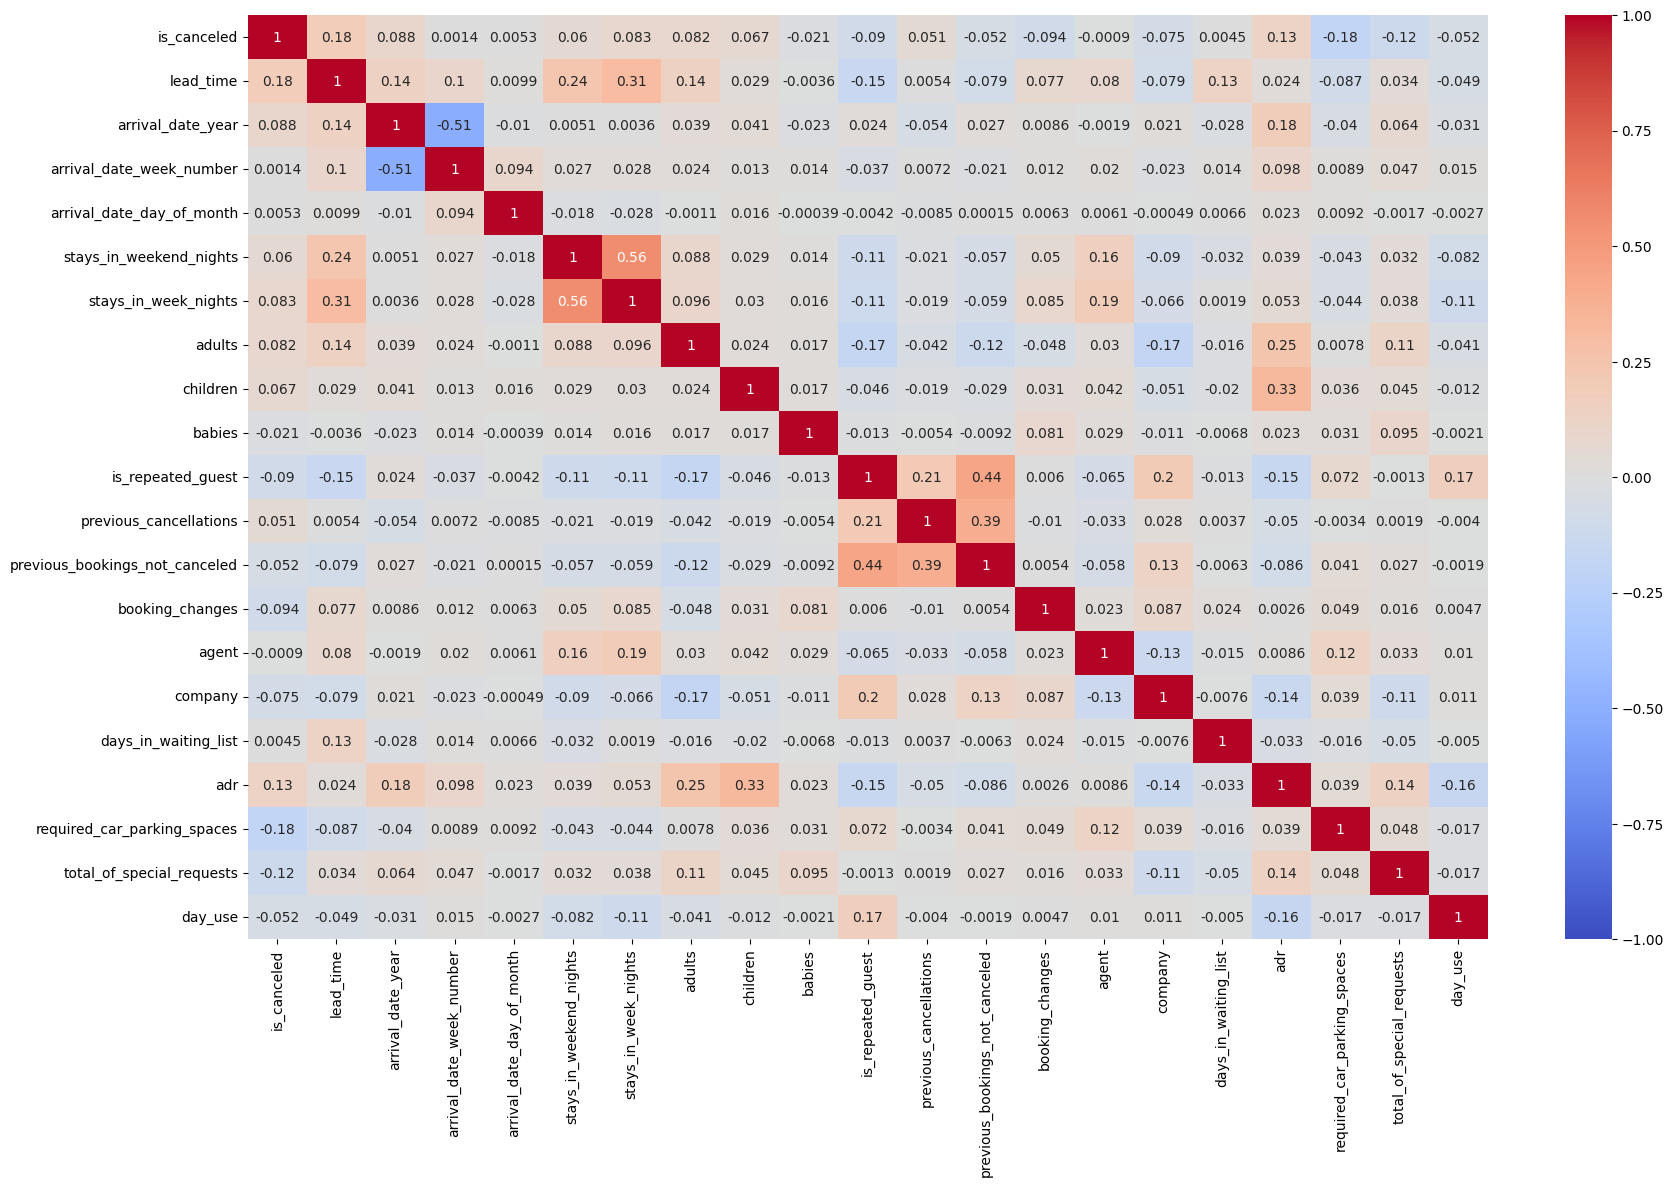

In [72]:
num_cols = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(20,12))
cor_matrix= num_cols.corr()
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()